<a href="https://colab.research.google.com/github/sowmya-520/AI/blob/main/UsedCarPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CAR PRICE PREDICTION**

# *Mounting Google Drive*

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing *Libraries*

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# *Loading the data*

In [3]:
car = pd.read_csv("/content/drive/MyDrive/Car details v3.csv")
car1=car.copy()
car.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


# ***DATA PRE PROCESSING***

In [4]:
#Printing the info of all columns in dataset
#and checking for null values
print(car.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB
None


# *Cleaning the data*

In [5]:
#Changing the values of mileage  example: from 23.4kmpl to 23.4
#Changing the values of engine   example: from 1248CC   to 1248

car['mileage']=car['mileage'].str.replace('kmpl',' ')
car['mileage']=pd.to_numeric(car['mileage'],errors='coerce')
car['max_power']=car['max_power'].str.replace('bhp',' ')
car['max_power']=pd.to_numeric(car['max_power'],errors='coerce')
car['engine']=car['engine'].str.replace('CC',' ')
car['engine']=pd.to_numeric(car['engine'],errors='coerce')
print(car['mileage'].sample(5))
print(car['max_power'].sample(5))
print(car['engine'].sample(5))

1502    16.10
1016    22.77
274     19.02
5632    16.80
3694    15.96
Name: mileage, dtype: float64
3224    102.0
7520     68.0
1423     67.1
7772    121.3
7499    138.1
Name: max_power, dtype: float64
7114    1197.0
5377    1461.0
1483    1248.0
841     1197.0
4690    1591.0
Name: engine, dtype: float64


In [6]:
#Dropping the torque column
car.drop(['torque'],axis=1,inplace=True)
car.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0


In [7]:
car.duplicated().sum()

1202

In [8]:
car.drop_duplicates(keep="first")

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8121,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998.0,67.10,5.0
8122,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54,1396.0,88.73,5.0
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,5.0


In [9]:
#Extracting brand from name
car['name']=car['name'].str.split(expand=True)[0]
car.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0


In [10]:
print('transmission: ',car.transmission.unique())
print('seller_type: ',car.seller_type.unique())
print('fuel: ',car.fuel.unique())
print('owner: ',car.owner.unique())

transmission:  ['Manual' 'Automatic']
seller_type:  ['Individual' 'Dealer' 'Trustmark Dealer']
fuel:  ['Diesel' 'Petrol' 'LPG' 'CNG']
owner:  ['First Owner' 'Second Owner' 'Third Owner' 'Fourth & Above Owner'
 'Test Drive Car']


# *Categorical Conversion*

In [11]:
trans1=pd.get_dummies(car['transmission'],drop_first=True)
car = pd.concat([car,trans1],axis=1)
car.drop(['transmission'],axis=1,inplace=True)

seller = pd.get_dummies(car['seller_type'],drop_first=True)
car=pd.concat([car,seller],axis=1)
car.drop(['seller_type'],axis=1,inplace=True)

fuel1=pd.get_dummies(car['fuel'],drop_first=True)
car=pd.concat([car,fuel1],axis=1)
car.drop(['fuel'],axis=1,inplace=True)

own=pd.get_dummies(car['owner'],drop_first=True)
car = pd.concat([car,own],axis=1)
car.drop(['owner'],axis=1,inplace=True)


In [12]:
car.head()

,name,year,selling_price,km_driven,mileage,engine,max_power,seats,Manual,Individual,Trustmark Dealer,Diesel,LPG,Petrol,Fourth & Above Owner,Second Owner,Test Drive Car,Third Owner
0,Maruti,2014,450000,145500,23.40,1248.0,74.00,5.0,1,1,0,1,0,0,0,0,0,0
1,Skoda,2014,370000,120000,21.14,1498.0,103.52,5.0,1,1,0,1,0,0,0,1,0,0
2,Honda,2006,158000,140000,17.70,1497.0,78.00,5.0,1,1,0,0,0,1,0,0,0,1
3,Hyundai,2010,225000,127000,23.00,1396.0,90.00,5.0,1,1,0,1,0,0,0,0,0,0
4,Maruti,2007,130000,120000,16.10,1298.0,88.20,5.0,1,1,0,0,0,1,0,0,0,0


In [13]:
#dropping name 
car=car.drop(['name'],axis=1)

# *Missing values treatment*

In [14]:
car.isnull().sum()

year                      0
selling_price             0
km_driven                 0
mileage                 309
engine                  221
max_power               216
seats                   221
Manual                    0
Individual                0
Trustmark Dealer          0
Diesel                    0
LPG                       0
Petrol                    0
Fourth & Above Owner      0
Second Owner              0
Test Drive Car            0
Third Owner               0
dtype: int64

In [15]:
m1=np.mean(car['mileage']) 
m2=np.mean(car['engine']) 
m3=np.mean(car['max_power']) 
m4=np.mean(car['seats'])
car_new=car.copy()
car['mileage'].fillna(value=m1,inplace=True) 
car['engine'].fillna(value=m2,inplace=True)
car['max_power'].fillna(value=m3,inplace=True)
car['seats'].fillna(value=m4,inplace=True)

In [16]:
print(car.isnull().sum())

year                    0
selling_price           0
km_driven               0
mileage                 0
engine                  0
max_power               0
seats                   0
Manual                  0
Individual              0
Trustmark Dealer        0
Diesel                  0
LPG                     0
Petrol                  0
Fourth & Above Owner    0
Second Owner            0
Test Drive Car          0
Third Owner             0
dtype: int64


# *Outliers Detection*

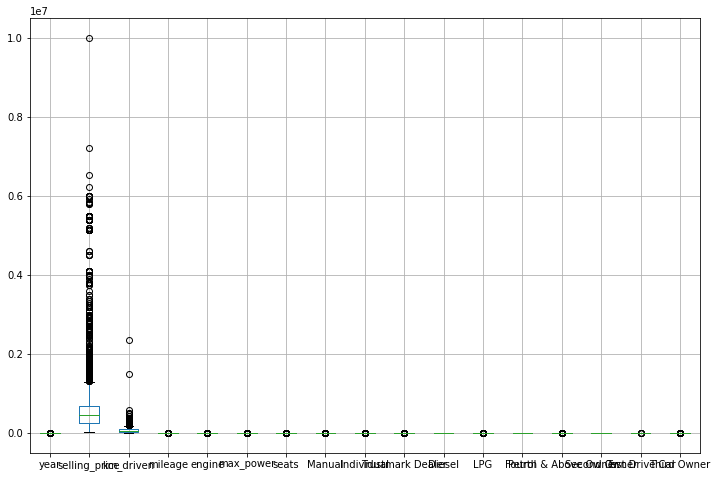

In [17]:
#Creating a box plot for the data
plt.figure(figsize=(12,8))
car.boxplot()
plt.show()

# *Outliers Treatement*

In [18]:
def outliers(df,ft):
   Q1=df[ft].quantile(0.25)
   Q3=df[ft].quantile(0.75)
   IQR=Q3-Q1

   lower_bound=Q1 - 1.5 * IQR
   upper_bound=Q3 + 1.5 * IQR
   
   ls=df.index[(df[ft] < lower_bound) | (df[ft] > upper_bound) ]
  
   return ls 

In [19]:
index_list=[]
for feature in ['year','selling_price','km_driven','mileage','engine','max_power','seats']:
  index_list.extend(outliers(car,feature))


In [20]:
print(index_list)
print(len(index_list))
print(car.shape)

[7, 177, 186, 316, 774, 808, 999, 1025, 1045, 1216, 1379, 1432, 1468, 1474, 1775, 1815, 1882, 1972, 2140, 2145, 2327, 2340, 2424, 2818, 2886, 3046, 3097, 3310, 3378, 3890, 3919, 3922, 4033, 4108, 4112, 4253, 4285, 4305, 4359, 4372, 4542, 4712, 4933, 5060, 5080, 5322, 5349, 5385, 5411, 5451, 5610, 5681, 5702, 5714, 5726, 5746, 5965, 5992, 6164, 6320, 6387, 6436, 6521, 6639, 6730, 6776, 6919, 6920, 6933, 7218, 7471, 7524, 7765, 7846, 7935, 7958, 7982, 7996, 8025, 8042, 8115, 41, 47, 49, 55, 57, 58, 59, 60, 75, 82, 110, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 145, 146, 148, 151, 156, 158, 163, 165, 166, 167, 170, 187, 257, 288, 350, 362, 370, 371, 372, 374, 375, 384, 385, 388, 409, 410, 411, 413, 414, 423, 424, 427, 452, 468, 470, 526, 550, 569, 595, 600, 646, 647, 648, 650, 651, 660, 661, 664, 681, 742, 906, 970, 1007, 1039, 1057, 1060, 1063, 1064, 1065, 1066, 1067, 1071, 1073, 1075, 1077, 1078, 1079, 1081, 1082, 1091, 1092, 1095, 1096, 1097, 1098, 1100, 1101, 1110, 1

In [21]:
def remove(df,ls):
   ls=sorted(set(ls))
   df=df.drop(ls)
   return df

In [22]:
#car=remove(car,index_list)
print(car.shape)
car

(8128, 17)


,year,selling_price,km_driven,mileage,engine,max_power,seats,Manual,Individual,Trustmark Dealer,Diesel,LPG,Petrol,Fourth & Above Owner,Second Owner,Test Drive Car,Third Owner
0,2014,450000,145500,23.40,1248.0,74.00,5.0,1,1,0,1,0,0,0,0,0,0
1,2014,370000,120000,21.14,1498.0,103.52,5.0,1,1,0,1,0,0,0,1,0,0
2,2006,158000,140000,17.70,1497.0,78.00,5.0,1,1,0,0,0,1,0,0,0,1
3,2010,225000,127000,23.00,1396.0,90.00,5.0,1,1,0,1,0,0,0,0,0,0
4,2007,130000,120000,16.10,1298.0,88.20,5.0,1,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,320000,110000,18.50,1197.0,82.85,5.0,1,1,0,0,0,1,0,0,0,0
8124,2007,135000,119000,16.80,1493.0,110.00,5.0,1,1,0,1,0,0,1,0,0,0
8125,2009,382000,120000,19.30,1248.0,73.90,5.0,1,1,0,1,0,0,0,0,0,0
8126,2013,290000,25000,23.57,1396.0,70.00,5.0,1,1,0,1,0,0,0,0,0,0


In [23]:
print(car['seats'].min())
print(car['seats'].max())

2.0
14.0


# *Data Normalisation*

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Applying scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['year','selling_price','km_driven','mileage','engine','max_power','seats']
car[num_vars] = scaler.fit_transform(car[num_vars])
car.head()

,year,selling_price,km_driven,mileage,engine,max_power,seats,Manual,Individual,Trustmark Dealer,Diesel,LPG,Petrol,Fourth & Above Owner,Second Owner,Test Drive Car,Third Owner
0,0.837838,0.042126,0.061640,0.557143,0.209396,0.1850,0.25,1,1,0,1,0,0,0,0,0,0
1,0.837838,0.034102,0.050837,0.503333,0.293289,0.2588,0.25,1,1,0,1,0,0,0,1,0,0
2,0.621622,0.012839,0.059310,0.421429,0.292953,0.1950,0.25,1,1,0,0,0,1,0,0,0,1
3,0.729730,0.019559,0.053803,0.547619,0.259060,0.2250,0.25,1,1,0,1,0,0,0,0,0,0
4,0.648649,0.010030,0.050837,0.383333,0.226174,0.2205,0.25,1,1,0,0,0,1,0,0,0,0


In [25]:
x = car.drop(['selling_price'],axis=1)
y = car['selling_price']
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  8128 non-null   float64
 1   selling_price         8128 non-null   float64
 2   km_driven             8128 non-null   float64
 3   mileage               8128 non-null   float64
 4   engine                8128 non-null   float64
 5   max_power             8128 non-null   float64
 6   seats                 8128 non-null   float64
 7   Manual                8128 non-null   uint8  
 8   Individual            8128 non-null   uint8  
 9   Trustmark Dealer      8128 non-null   uint8  
 10  Diesel                8128 non-null   uint8  
 11  LPG                   8128 non-null   uint8  
 12  Petrol                8128 non-null   uint8  
 13  Fourth & Above Owner  8128 non-null   uint8  
 14  Second Owner          8128 non-null   uint8  
 15  Test Drive Car       

# *Split Data*

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 2)

# ***Multiple Regression Model***

# *Model Training*

In [27]:
from sklearn.linear_model import LinearRegression
regressor1= LinearRegression()
regressor1.fit(x_train,y_train)

LinearRegression()

# *Predicting on training and testing data*

In [28]:
y_train_pred1 = regressor1.predict(x_train)
y_test_pred1=regressor1.predict(x_test)

In [29]:
df = pd.DataFrame({'Actual values':y_train, 'Predicted values':y_train_pred1})
df

,Actual values,Predicted values
6310,0.056670,0.041552
2219,0.028586,0.028874
4600,0.017553,0.019924
2167,0.003009,-0.030837
5272,0.039619,0.097668
...,...,...
3606,0.059178,0.086936
5704,0.030592,0.016803
6637,0.042126,0.059876
2575,0.062287,0.052045


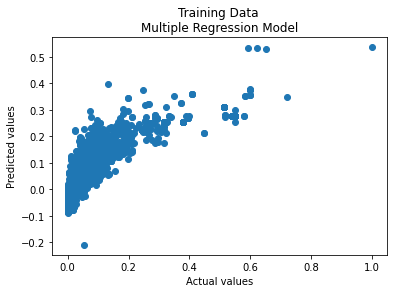

In [30]:
plt.scatter(y_train,y_train_pred1)
plt.title('Training Data \nMultiple Regression Model')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

In [31]:
#Testing data
df=pd.DataFrame({'Actual values':y_test, 'Predicted values':y_test_pred1})
df

,Actual values,Predicted values
606,0.017051,0.008721
7575,0.072217,0.104664
7705,0.197593,0.190226
4305,0.002207,0.001939
2685,0.048144,0.105789
...,...,...
2497,0.037111,0.044773
5894,0.024574,0.053912
1150,0.075125,0.107699
1062,0.041123,0.167977


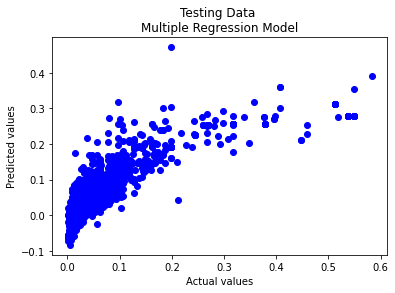

In [32]:
plt.scatter(y_test, y_test_pred1, color = 'blue')
plt.title('Testing Data \nMultiple Regression Model')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

# *Error Metrics Computation*

In [33]:
import math as mt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


#Training Accuracies
rmse = mt.sqrt(mean_squared_error(y_train, y_train_pred1)) 
print('Root mean square error', rmse) 
mse = (mean_squared_error(y_train, y_train_pred1)) 
print('Mean square error', mse) 
mae=mean_absolute_error(y_train, y_train_pred1)
print('Mean absolute error', mae)

Root mean square error 0.04608763711681842
Mean square error 0.0021240702950115387
Mean absolute error 0.027584524424320554


In [34]:
#Testing Accuracies
rmse = mt.sqrt(mean_squared_error(y_test, y_test_pred1)) 
print('Root mean square error', mse) 
mse = (mean_squared_error(y_test, y_test_pred1)) 
print('Mean square error', mse) 
mae=mean_absolute_error(y_test, y_test_pred1)
print('Mean absolute error', mae)

Root mean square error 0.0021240702950115387
Mean square error 0.0019305576366817157
Mean absolute error 0.02668444721694027


# ***Decision Tree Model***

In [35]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.tree import plot_tree
regressor2 = DecisionTreeRegressor(max_depth=100)
regressor2.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=100)

# *Prediction*

In [36]:
#Training data
y_train_pred2=regressor2.predict(x_train)
df=pd.DataFrame({'Actual values':y_train,'Predicted values':y_train_pred2})
df


,Actual values,Predicted values
6310,0.056670,0.056670
2219,0.028586,0.028586
4600,0.017553,0.017553
2167,0.003009,0.003009
5272,0.039619,0.047392
...,...,...
3606,0.059178,0.059178
5704,0.030592,0.030592
6637,0.042126,0.042126
2575,0.062287,0.062287


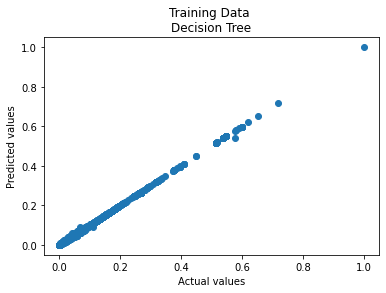

In [37]:
plt.scatter(y_train,y_train_pred2)
plt.title('Training Data \nDecision Tree')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

In [38]:
#Testing data
y_test_pred2=regressor2.predict(x_test)
df=pd.DataFrame({'Actual values':y_test,'Predicted values':y_test_pred2})
df

,Actual values,Predicted values
606,0.017051,0.015045
7575,0.072217,0.072217
7705,0.197593,0.197593
4305,0.002207,0.003009
2685,0.048144,0.042126
...,...,...
2497,0.037111,0.032096
5894,0.024574,0.012036
1150,0.075125,0.075125
1062,0.041123,0.041123


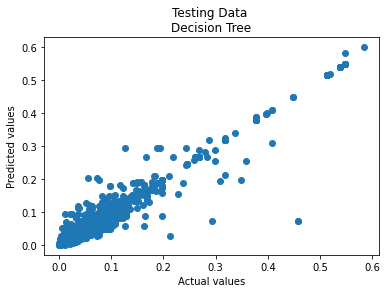

In [39]:
plt.scatter(y_test,y_test_pred2)
plt.title('Testing Data \nDecision Tree')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

# *Error Computation*

In [40]:
#Training data
rmse = mt.sqrt(mean_squared_error(y_train,y_train_pred2))
print('Root mean square error: ',rmse)
mse = mean_squared_error(y_train,y_train_pred2)
print('Mean square error: ',mse)
mae = mean_absolute_error(y_train,y_train_pred2)
print('Mean absolute error: ',mae) 

Root mean square error:  0.0013763249989242738
Mean square error:  1.894270502663902e-06
Mean absolute error:  0.0003090206924744301


In [41]:
#Testing data
rmse = mt.sqrt(mean_squared_error(y_test,y_test_pred2))
print('Root mean square error: ',rmse)
mse = mean_squared_error(y_test,y_test_pred2)
print('Mean square error: ',mse)
mae = mean_absolute_error(y_test,y_test_pred2)
print('Mean absolute error: ',mae) 

Root mean square error:  0.019949234838602684
Mean square error:  0.000397971970645719
Mean absolute error:  0.008524421819252394


# ***Random Forest***

In [42]:
from sklearn.ensemble import RandomForestRegressor
regressor3=RandomForestRegressor(n_estimators=3,max_depth=3)
regressor3.fit(x_train,y_train)

RandomForestRegressor(max_depth=3, n_estimators=3)

# *Prediction*

In [43]:
y_train_pred3=regressor3.predict(x_train)
y_test_pred3=regressor3.predict(x_test)

# *Model Metrics*

In [44]:
df=pd.DataFrame({'Actual values':y_train,'Predicted values':y_train_pred3})
df

,Actual values,Predicted values
6310,0.056670,0.056932
2219,0.028586,0.056932
4600,0.017553,0.024223
2167,0.003009,0.024223
5272,0.039619,0.024223
...,...,...
3606,0.059178,0.056932
5704,0.030592,0.056932
6637,0.042126,0.056932
2575,0.062287,0.056932


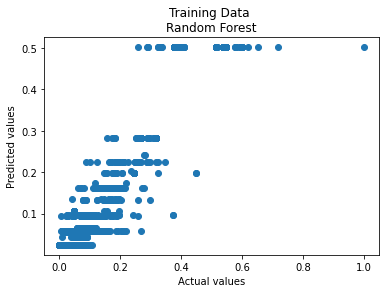

In [45]:
plt.scatter(y_train,y_train_pred3)
plt.title('Training Data \nRandom Forest')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

In [46]:
df=pd.DataFrame({'Actual values':y_test,'Predicted values':y_test_pred3})
df

,Actual values,Predicted values
606,0.017051,0.024223
7575,0.072217,0.043217
7705,0.197593,0.162349
4305,0.002207,0.024223
2685,0.048144,0.024223
...,...,...
2497,0.037111,0.056932
5894,0.024574,0.024223
1150,0.075125,0.056932
1062,0.041123,0.055236


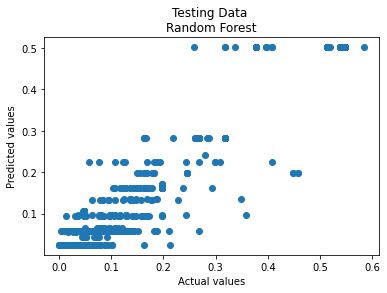

In [47]:
plt.scatter(y_test,y_test_pred3)
plt.title('Testing Data \nRandom Forest')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

# *Error Computation*

In [48]:
#Training error
rmse = mt.sqrt(mean_squared_error(y_train,y_train_pred3))
print("Root mean square error: ",rmse)
mse = mean_squared_error(y_train,y_train_pred3)
print("Mean squared error: ",mse)
mae = mean_absolute_error(y_train,y_train_pred3)
print("Mean absolute error: ",mae)

Root mean square error:  0.02926468109338311
Mean squared error:  0.000856421559497415
Mean absolute error:  0.019096029474012396


In [49]:
#Testing error
rmse = mt.sqrt(mean_squared_error(y_test,y_test_pred3))
print("Root mean square error: ",rmse)
mse = mean_squared_error(y_test,y_test_pred3)
print("Mean squared error: ",mse)
mae = mean_absolute_error(y_test,y_test_pred3)
print("Mean absolute error: ",mae)

Root mean square error:  0.030653275819789223
Mean squared error:  0.0009396233184840746
Mean absolute error:  0.019099718563118612


In [50]:
import pickle
filename='model.pkl'
pickle.dump(regressor1,open(filename,'wb'))
